In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving loan_data.csv to loan_data (1).csv


In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == "object":
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str)).astype(int)
df = df.astype({col: 'int' for col in df.select_dtypes(include='object').columns})


person_gender
person_education
person_home_ownership
loan_intent
previous_loan_defaults_on_file


In [ ]:
df.head(15)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1
6,26.0,0,1,93471.0,1,3,35000.0,1,12.42,0.37,3.0,701,0,1
7,24.0,0,3,95550.0,5,3,35000.0,3,11.11,0.37,4.0,585,0,1
8,24.0,0,0,100684.0,3,3,35000.0,4,8.90,0.35,2.0,544,0,1
9,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df.drop(columns=['loan_status'])
y = df['loan_status']
# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df


,MSE,RMSE,RSE,RSS,R^2
Regression Tree,0.104104,0.322628,0.322795,1405.400000,0.397828
Ridge Regression,0.094615,0.307592,0.307752,1277.308688,0.452713
Lasso Regression,0.172907,0.415816,0.416032,2334.250997,-0.000118
Principal Component Regression (PCR),0.094616,0.307593,0.307752,1277.309358,0.452713
Regression Splines,0.161059,0.369918,0.370110,2174.291589,0.066256
Support Vector Regression (SVR),0.069852,0.264281,0.264418,943.006378,0.595972


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 100}
Ridge Regression - Metrics: {'MSE': 0.09525344909338596, 'RMSE': 0.30863157501037697, 'RSE': 0.3087917307737837, 'RSS': 1285.9215627607105, 'R²': 0.4498068914750999}



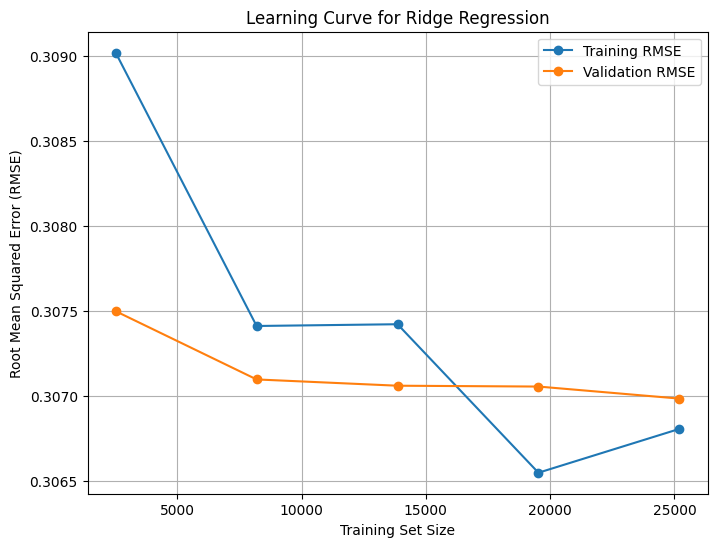

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.09631020706227843, 'RMSE': 0.31033885844714715, 'RSE': 0.3104999001577618, 'RSS': 1300.1877953407588, 'R²': 0.4437029555295008}



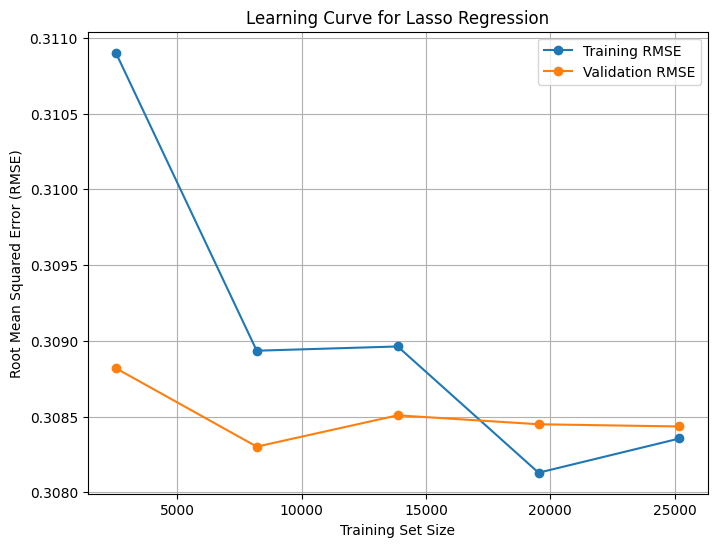

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 13}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.09524890174669626, 'RMSE': 0.3086242079725702, 'RSE': 0.30878435991305775, 'RSS': 1285.8601735803995, 'R²': 0.4498331573881409}



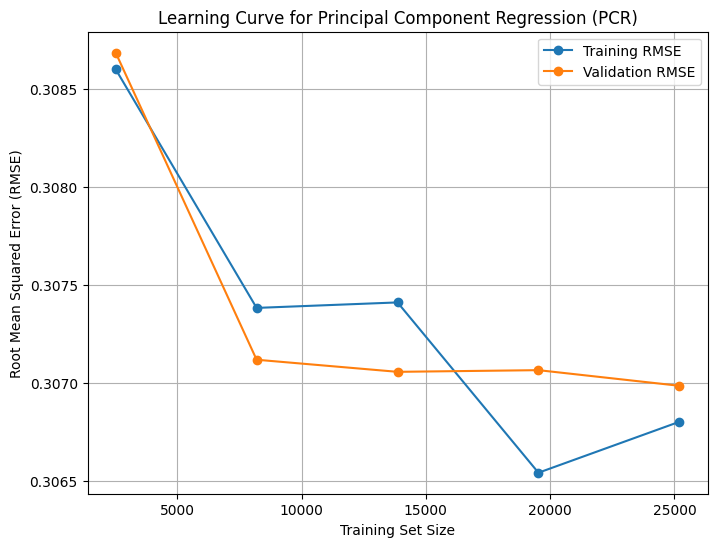

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 0.07465926580891624, 'RMSE': 0.27323847790696726, 'RSE': 0.27338026740799226, 'RSS': 1007.9000884203692, 'R²': 0.5687608802981745}



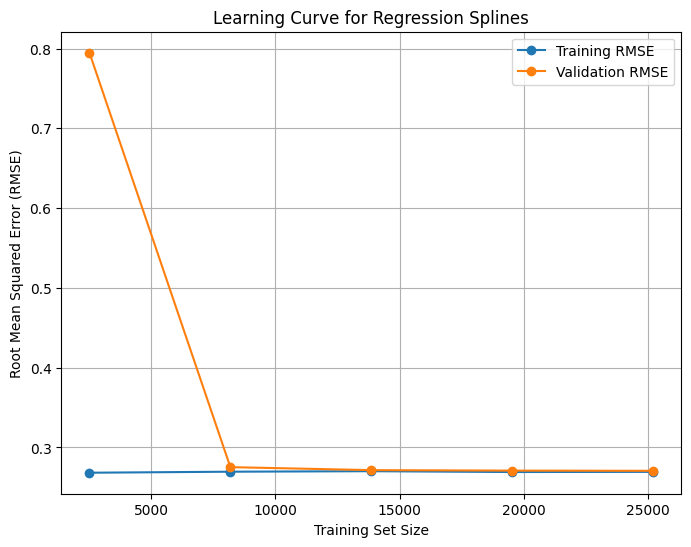

Running GridSearchCV for Regression Tree...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 8, 'decisiontreeregressor__min_samples_split': 10}
Regression Tree - Metrics: {'MSE': 0.0667982348654665, 'RMSE': 0.258453544888567, 'RSE': 0.2585876621602214, 'RSS': 901.7761706837978, 'R²': 0.61416695317168}



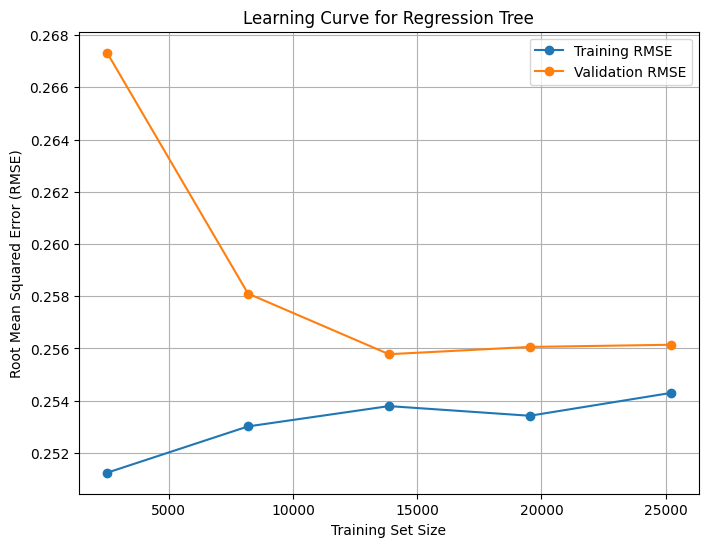

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.07092553586531476, 'RMSE': 0.2663184857746731, 'RSE': 0.2664566843384368, 'RSS': 957.4947341817492, 'R²': 0.5903272645458315}



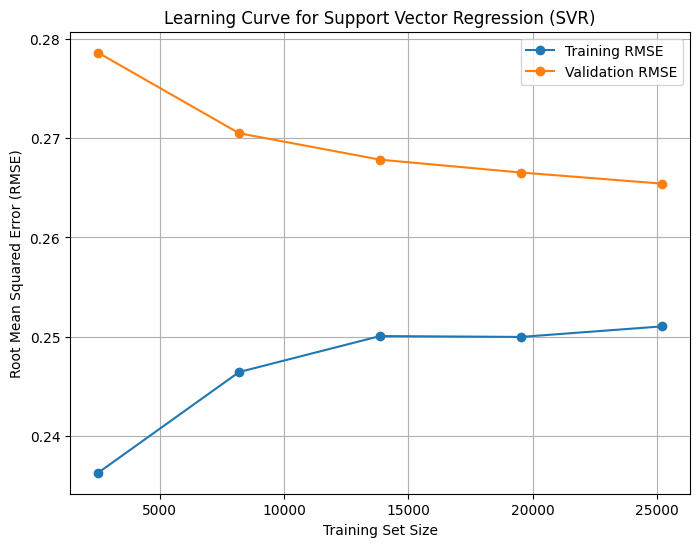


Model Performance Metrics:
                                           MSE      RMSE       RSE  \
Ridge Regression                      0.095253  0.308632  0.308792   
Lasso Regression                      0.096310  0.310339  0.310500   
Principal Component Regression (PCR)  0.095249  0.308624  0.308784   
Regression Splines                    0.074659  0.273238  0.273380   
Regression Tree                       0.066798  0.258454  0.258588   
Support Vector Regression (SVR)       0.070926  0.266318  0.266457   

                                              RSS        R²  
Ridge Regression                      1285.921563  0.449807  
Lasso Regression                      1300.187795  0.443703  
Principal Component Regression (PCR)  1285.860174  0.449833  
Regression Splines                    1007.900088  0.568761  
Regression Tree                        901.776171  0.614167  
Support Vector Regression (SVR)        957.494734  0.590327  

Best Parameters for Each Model:
Ridge Regressi

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
      'decisiontreeregressor__max_depth': [3, 4, 5],
      'decisiontreeregressor__min_samples_split': [10, 15, 20],
      'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
},
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")


In [ ]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,0.095253,0.308632,0.308792,1285.921563,0.449807
Lasso Regression,0.096310,0.310339,0.310500,1300.187795,0.443703
Principal Component Regression (PCR),0.095249,0.308624,0.308784,1285.860174,0.449833
Regression Splines,0.074659,0.273238,0.273380,1007.900088,0.568761
Regression Tree,0.066798,0.258454,0.258588,901.776171,0.614167
Support Vector Regression (SVR),0.070926,0.266318,0.266457,957.494734,0.590327
